# A - Libraries + Setup

In [ ]:
# Data handling
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
import seaborn as sns
import graphviz
import plotly.express as px

# Profiling
from ydata_profiling import ProfileReport

# PreProcessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Params search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Setting
import warnings
warnings.filterwarnings("ignore")

# B - Input Data

In [ ]:
#Thông tin về data: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset
dataset = pd.read_csv(r'input\smoking_driking_dataset_Ver01.csv')

In [ ]:
dataset

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


## 1 - Data quality control

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
# Kiểm tra values của dữ liệu
for col in dataset.columns:
  print(f"Column '{col}' and top 5 values")
  print(dataset[col].value_counts(dropna=False).head(5))
  print()
  print(f"All values")
  print(sorted(dataset[col].unique()))
  print("_______________________________")
  print()

Column 'sex' and top 5 values
sex
Male      526415
Female    464931
Name: count, dtype: int64

All values
['Female', 'Male']
_______________________________

Column 'age' and top 5 values
age
40    130385
50    129434
45    118355
55    111223
60    106063
Name: count, dtype: int64

All values
[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
_______________________________

Column 'height' and top 5 values
height
160    181809
165    178228
170    166328
155    165678
150    107929
Name: count, dtype: int64

All values
[130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190]
_______________________________

Column 'weight' and top 5 values
weight
60    151134
55    150415
65    141241
50    125079
70    122281
Name: count, dtype: int64

All values
[25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140]
_______________________________

Column 'waistline' and top 5 values
waistline
80.0    37790
81.0    34603
82.0    3402

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

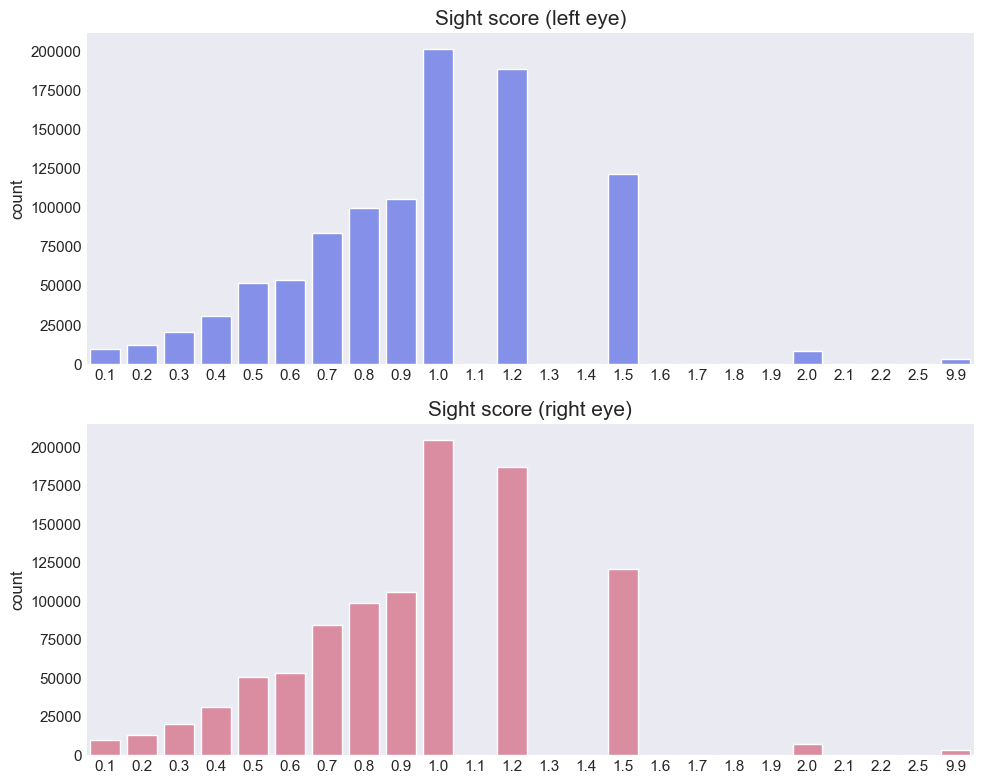

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

axes[0].set_title('Sight score (left eye)', size=15)
axes[0].xaxis.label.set_visible(False)
sns.countplot(x=dataset['sight_left'], color='#7585f8', ax=axes[0])

axes[1].set_title('Sight score (right eye)', size=15)
axes[1].xaxis.label.set_visible(False)
sns.countplot(x=dataset['sight_right'], color='#e7809b', ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
dataset.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614,14.181,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.241,9.283,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284,12.514,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233,11.850,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.981,0.606,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978,0.605,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031,0.175,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030,0.172,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432,14.543,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.053,9.889,32.0,70.0,76.0,82.0,185.0


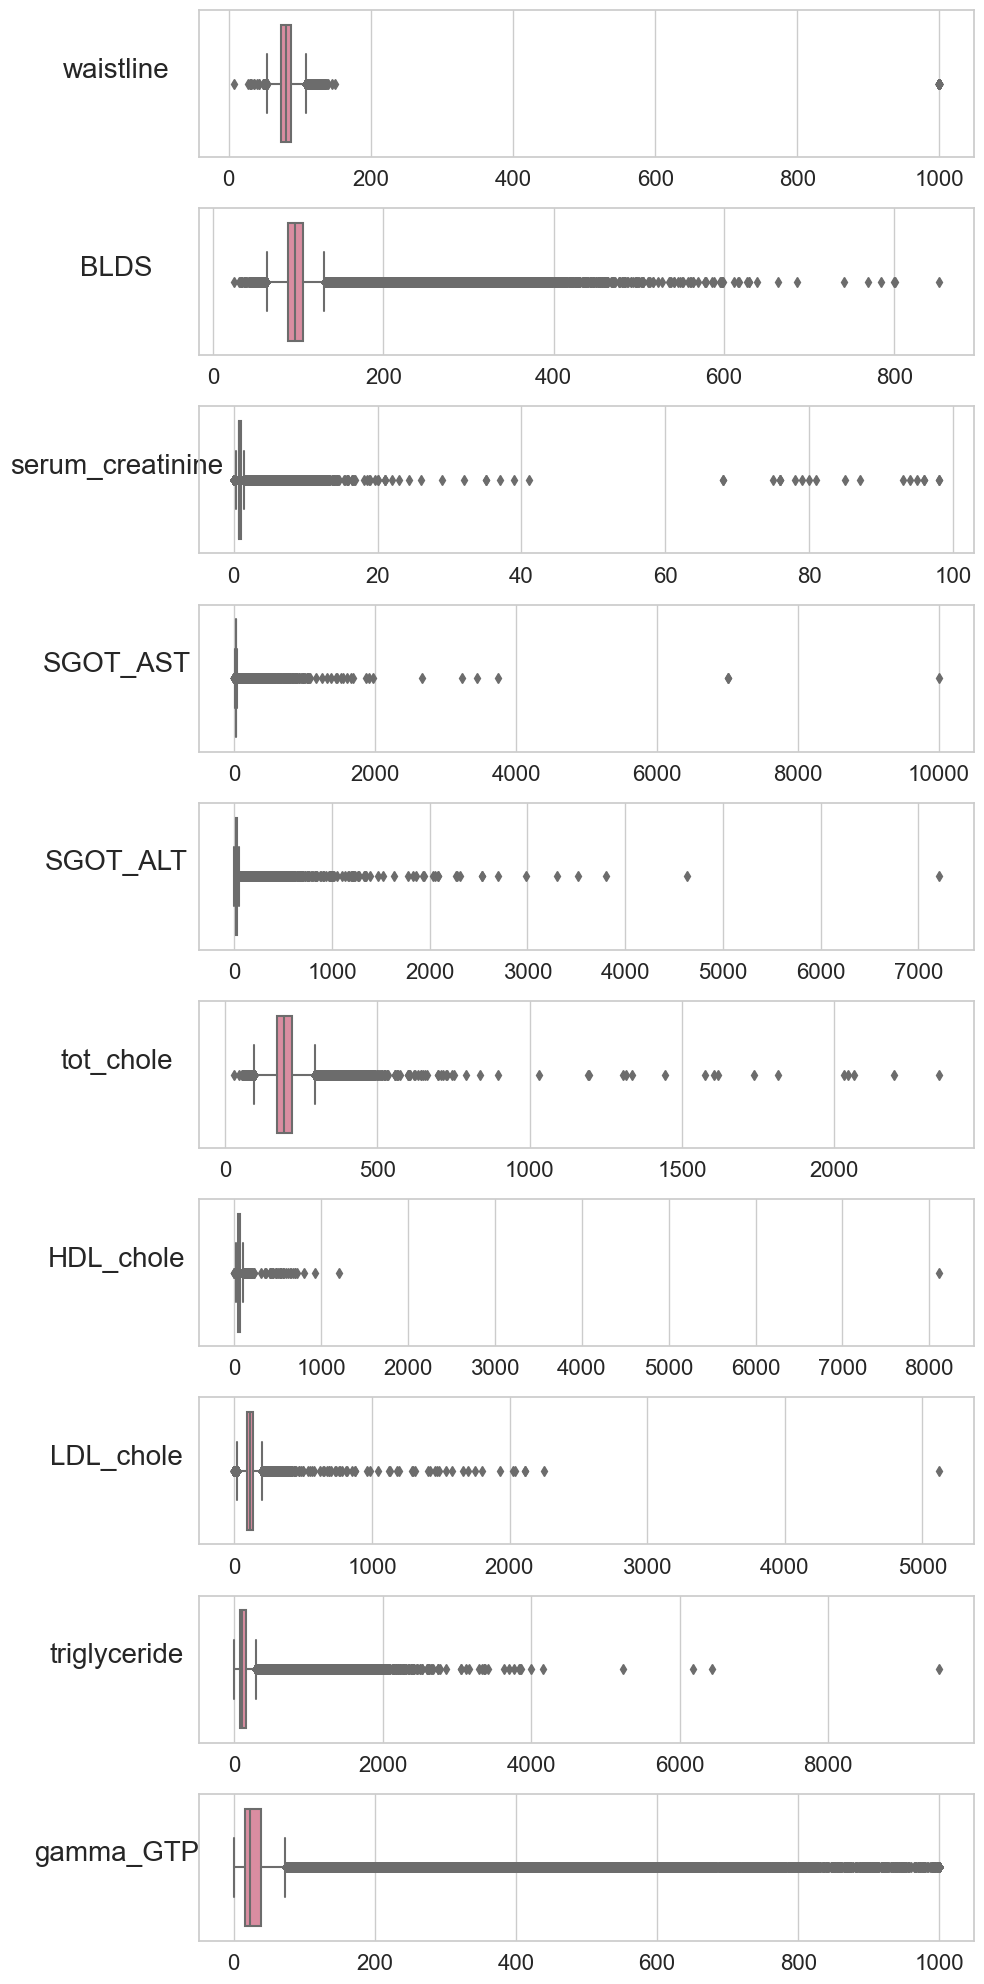

In [ ]:
sns.set(style="whitegrid")
columns = [
    'waistline',
    'BLDS',
    'serum_creatinine',
    'SGOT_AST',
    'SGOT_ALT',
    'tot_chole',
    'HDL_chole',
    'LDL_chole',
    'triglyceride',
    'gamma_GTP'
    ]

fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 20))

# Vẽ từng column
for i, column in enumerate(columns):
    sns.boxplot(data=dataset[column], color='#e7809b', ax=axes[i], orient="h")  # Use 'i' instead of 'col'
    axes[i].set_ylabel(column, rotation=0, labelpad=50, size=20)
    axes[i].set_yticklabels([])
    # Increase the size of x-tick labels
    axes[i].tick_params(axis='x', labelsize=16)  # Adjust the labelsize as needed

plt.tight_layout()
plt.show()

In [ ]:
dataset_trim = dataset.copy()
dataset_trim = dataset_trim[dataset_trim['waistline'] <= 200]
dataset_trim = dataset_trim[dataset_trim['waistline'] > 8]
dataset_trim = dataset_trim[dataset_trim['serum_creatinine'] <= 30]
dataset_trim = dataset_trim[dataset_trim['SGOT_AST'] <= 2000]
dataset_trim = dataset_trim[dataset_trim['SGOT_ALT'] <= 2000]
dataset_trim = dataset_trim[dataset_trim['tot_chole'] <= 1000]
dataset_trim = dataset_trim[(dataset_trim['HDL_chole'] + dataset_trim['LDL_chole'] + dataset_trim['triglyceride']*0.2) <= (dataset_trim['tot_chole']+1)]
dataset_trim = dataset_trim[(dataset_trim['HDL_chole'] + dataset_trim['LDL_chole'] + dataset_trim['triglyceride']*0.2) >= (dataset_trim['tot_chole']-1)]

dataset_trim['sight_left'] = dataset_trim['sight_left'].replace(9.9, 0)
dataset_trim['sight_right'] = dataset_trim['sight_right'].replace(9.9, 0)


In [ ]:
dataset_trim.shape

(930627, 24)

## 2 - Encoding

In [ ]:
dataset_trim['sex'].value_counts()

sex
Male      485011
Female    445616
Name: count, dtype: int64

In [ ]:
# Drink YN label
yes_no_dict = {
    'Y': 1,
    'N': 0
}
dataset_trim['DRK_YN'] = dataset_trim['DRK_YN'].map(yes_no_dict)

In [ ]:
# Drink YN label
gender_dict = {
    'Male': 1,
    'Female': 0
}
dataset_trim['sex'] = dataset_trim['sex'].map(gender_dict)

In [ ]:
dataset_trim.head(2)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0


In [ ]:
# seperate numeric columns
dataset_numeric = dataset_trim.select_dtypes(include='number')

# encode the categories columns using onthot
dataset_trim['SMK_stat_type_cd'] = dataset_trim['SMK_stat_type_cd'].astype(int)
onehot_smoke = pd.get_dummies(dataset_trim['SMK_stat_type_cd'], prefix = 'smoke').astype(int)

dataset_encode = pd.concat([
    dataset_numeric,
    onehot_smoke
], axis = 1)

In [ ]:
dataset_encode

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,smoke_1,smoke_2,smoke_3
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,1,0,0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,0,0,1
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,1,0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,1,0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0,1,0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0,1,0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1,0,0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0,1,0,0


In [ ]:
dataset_encode.describe().T[['min', 'max']]

,min,max
sex,0.0,1.0
age,20.0,85.0
height,130.0,190.0
weight,25.0,140.0
waistline,27.0,149.1
sight_left,0.0,2.5
sight_right,0.0,2.5
hear_left,1.0,2.0
hear_right,1.0,2.0
SBP,67.0,273.0


## 3 - EDA

In [ ]:
# # Sử dụng profiling tool để EDA nhanh dữ liệu
# profile = ProfileReport(dataset, title="Profiling Report")
# profile.to_notebook_iframe()

## 4 - Choose X, y

In [ ]:
dataset_encode.sample(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,smoke_1,smoke_2,smoke_3
806052,0,50,160,50,66.0,1.2,1.0,1.0,1.0,98.0,60.0,87.0,199.0,70.0,115.0,67.0,9.2,1.0,0.6,17.0,10.0,10.0,1.0,0,1,0,0
271025,0,70,155,70,107.0,0.7,0.4,2.0,1.0,120.0,70.0,100.0,201.0,40.0,141.0,97.0,13.7,1.0,0.8,17.0,15.0,13.0,1.0,0,1,0,0
542341,0,60,150,65,75.0,0.6,0.6,1.0,1.0,118.0,78.0,105.0,206.0,61.0,119.0,126.0,13.6,1.0,0.6,19.0,15.0,14.0,1.0,0,1,0,0


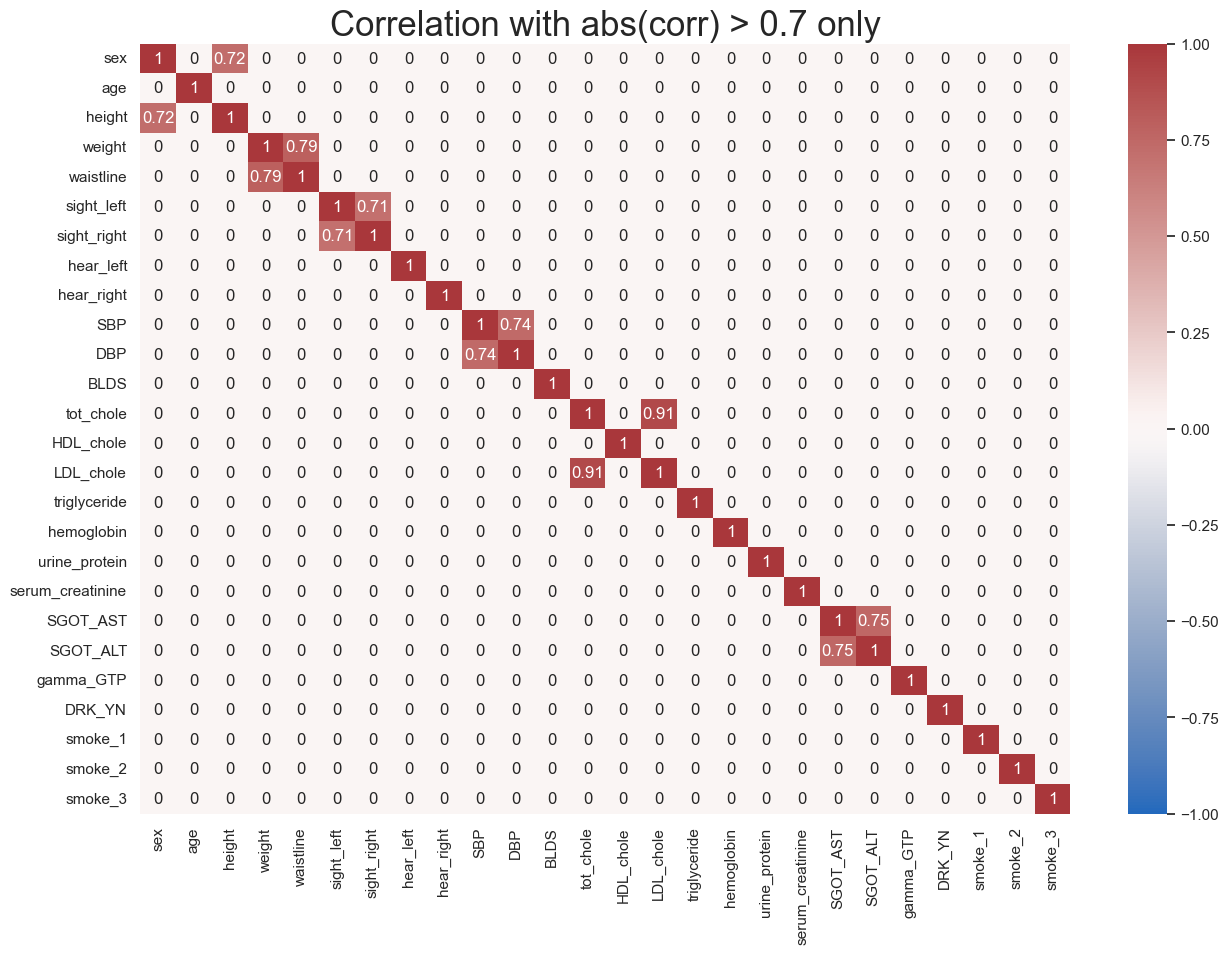

In [ ]:
# Tạo dataframe correlation và chỉ lấy các giá trị có correlation ngoài khoảng (-0.0, 0.0)
def high_corr(value):
  if -0.7 < value < 0.7:
    return 0
  return value

high_corr_df = dataset_encode.copy()

ignore_columns = ['SMK_stat_type_cd']
high_corr_df.drop(columns=ignore_columns, inplace=True)

high_corr_df = high_corr_df.corr().round(2)
high_corr_df = high_corr_df.applymap(high_corr)

# Vẽ chart chỉ thể hiện các giá trị correlation cao
plt.figure(figsize=(15,10))
pick_cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(high_corr_df, annot=True, cmap=pick_cmap, vmin=-1, vmax=1)
plt.title("Correlation with abs(corr) > 0.7 only", size=25)
plt.show()


In [ ]:
# Để xử lý SBP và DBP có correlation cao, ta có thể tạo ra giáo trị Mean Arterial Pressure
# MAP = (2*DBP + SBP) / 3
dataset_encode['MAP'] = (2*dataset_encode['DBP'] + dataset_encode['SBP'])/3

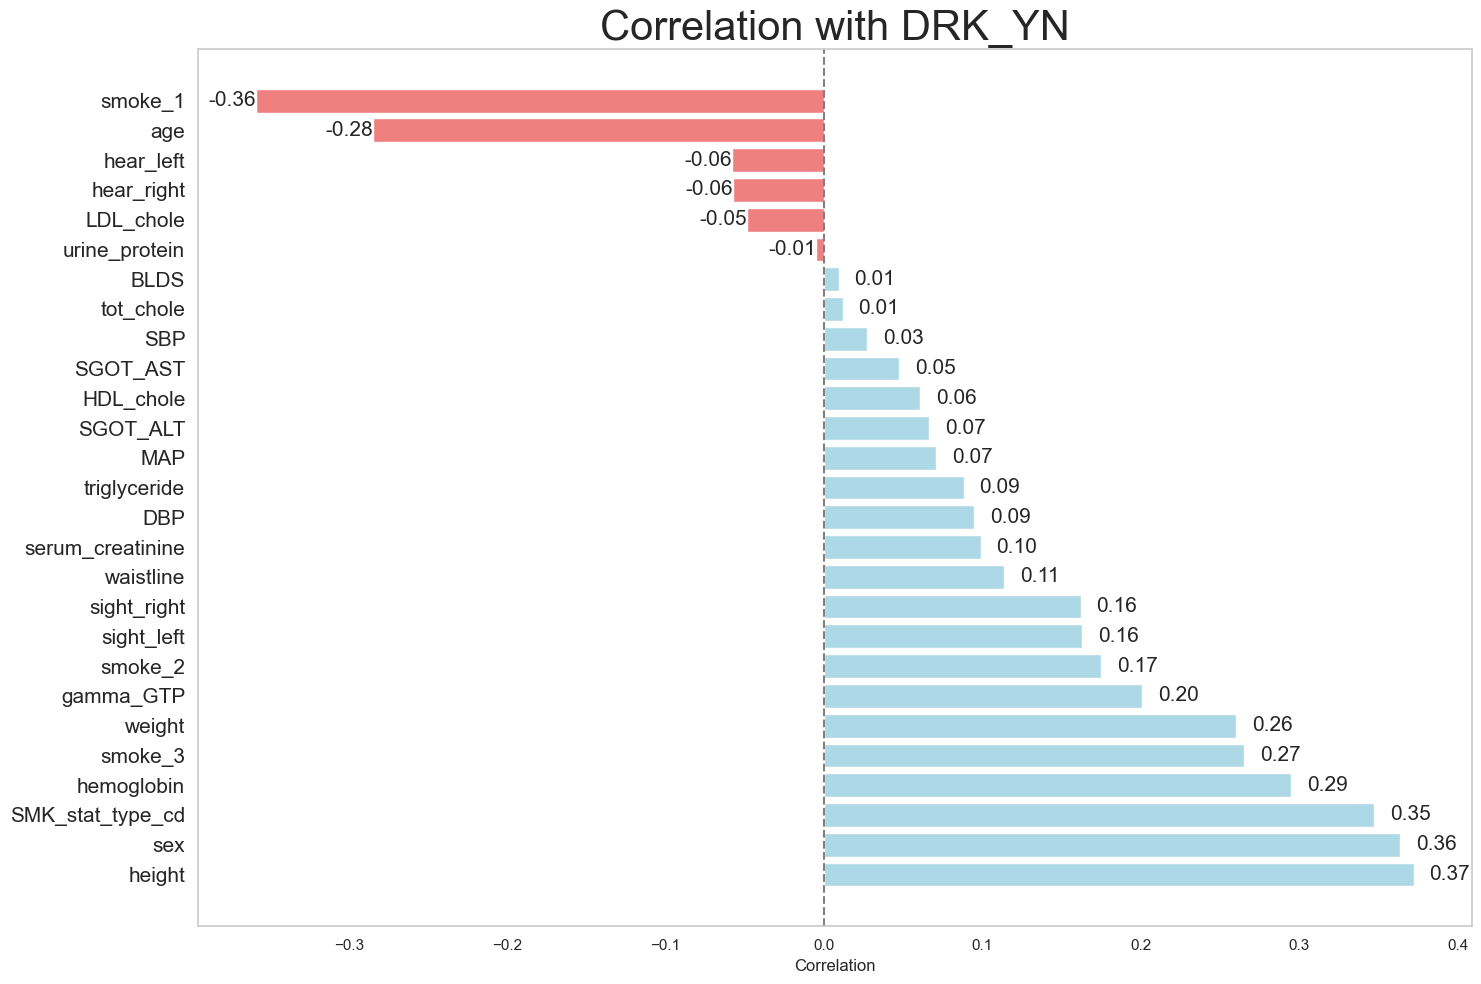

In [ ]:
# Tính correlation cho các cột đối với dữ liệu DRK_YN
correlation_data = dataset_encode.corr()[['DRK_YN']]
correlation_data.drop(index='DRK_YN', inplace=True)
correlation_data = correlation_data.sort_values(by='DRK_YN', ascending=False)

# Plot chart
fig, ax = plt.subplots(figsize=(15, 10))

# Vẽ đường phân cách tại x = 0
ax.axvline(x=0, color='gray', linestyle='--')

# Vẽ bar chart
colors = np.where(correlation_data['DRK_YN'] > 0, 'lightblue', 'lightcoral')
bars = ax.barh(correlation_data.index, correlation_data['DRK_YN'], color=colors)

# Viết giá trị cho từng bar chart
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.01 if width >= 0 else width - 0.03 # Nếu > 0 thì viết bên phải, không thì viết bên trái
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=15)

ax.set_xlabel('Correlation')
ax.set_title('Correlation with DRK_YN', size=30)
ax.tick_params(axis='y', labelsize=15)

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Các cột nằm ngoài khoảng (-0.15, 0.15)
sorted(correlation_data[ ~correlation_data['DRK_YN'].between(-0.15, 0.15) ].index)

['SMK_stat_type_cd',
 'age',
 'gamma_GTP',
 'height',
 'hemoglobin',
 'sex',
 'sight_left',
 'sight_right',
 'smoke_1',
 'smoke_2',
 'smoke_3',
 'weight']

In [ ]:
X_cols = [
    'age',
    'gamma_GTP',
    'height',
    'hemoglobin',
    'sex',
    'sight_left',
    'sight_right',
    'smoke_1',
    'smoke_2',
    'smoke_3',
    'weight'
]
y_col = 'DRK_YN'

## 5 - Normalization

In [ ]:
dataset = dataset_encode.copy()

In [ ]:
# Reset index của dữ liệu trước khi scale
dataset.reset_index(drop=True, inplace=True)

In [ ]:
# Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[X_cols])

# Lưu vào dataframe mới
dataset_scaled = pd.DataFrame(data = X_scaled, columns = X_cols)

# Bổ sung cột target y
dataset_scaled[y_col] = dataset[y_col]

dataset_scaled.head()

,age,gamma_GTP,height,hemoglobin,sex,sight_left,sight_right,smoke_1,smoke_2,smoke_3,weight,DRK_YN
0,-0.893576,0.087016,0.854751,1.834744,0.958528,0.151481,0.158846,0.788994,-0.45804,-0.515975,0.963730,1
1,-1.243971,-0.187730,1.932093,1.013014,0.958528,-0.138215,0.740793,-1.267437,-0.45804,1.938080,1.366048,0
2,-0.543181,0.678774,0.316079,1.013014,0.958528,0.730874,1.613714,0.788994,-0.45804,-0.515975,0.963730,0
3,0.157610,-0.377938,1.393422,2.150794,0.958528,1.599964,0.740793,0.788994,-0.45804,-0.515975,1.366048,0
4,0.157610,-0.229998,0.316079,-0.251187,0.958528,0.151481,0.740793,0.788994,-0.45804,-0.515975,-0.243224,0


In [ ]:
dataset

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,smoke_1,smoke_2,smoke_3,MAP
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,1,0,0,93.333333
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,0,0,1,98.000000
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,1,0,0,86.666667
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,1,0,0,106.333333
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,1,0,0,100.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930622,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0,1,0,0,91.333333
930623,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0,1,0,0,95.000000
930624,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1,0,0,1,83.333333
930625,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0,1,0,0,89.000000


In [ ]:
dataset['DRK_YN'].value_counts()

DRK_YN
0    472987
1    457640
Name: count, dtype: int64

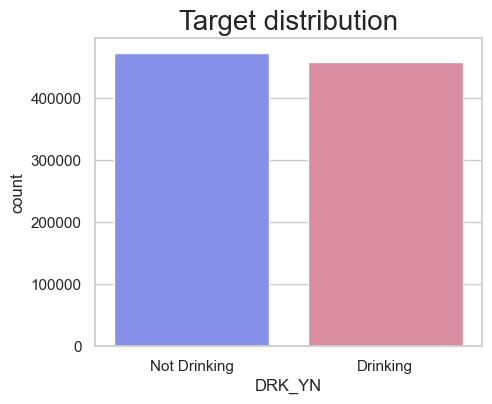

In [ ]:
fig, axes = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x=dataset['DRK_YN'], palette=['#7585f8','#e7809b'])
ax.set_xticklabels(['Not Drinking', 'Drinking'])
plt.title("Target distribution", size=20)
plt.show()


# C - Build Classification Models

In [ ]:
plt.style.use("seaborn-dark")

## 0 - Prepare

In [ ]:
# Tách dữ liệu train-test
X = dataset[X_cols].values
y = dataset[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(len(y_train))
print(len(y_test))

651438
279189


In [ ]:
def calculate_TP_FP_FN_TN(y_test, y_pred):
  result = []
  # Tạo confusion matrix
  confusion = confusion_matrix(y_test, y_pred)

  # Tính giá trị TP FP FN TN mỗi class
  num_classes = len(confusion)
  for i in range(num_classes):
      tp = confusion[i, i]
      fp = sum(confusion[:, i]) - tp    # Tổng cột - TP
      fn = sum(confusion[i, :]) - tp    # Tổng hàng - TP
      tn = sum(sum(confusion)) - tp - fp - fn
      print(f"Type {i+1} - TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

      # Lưu vào kết quả
      result.append([tp, fp, fn, tn])
  return result

In [ ]:
# Tạo bảng chứa kết quả của các mô hình
model_results = {
 # Dữ liệu lưu lại sẽ trông như vầy
    # model_class : {
      # 'params: ,              # Nếu có (Logit và GNB không có params)
      # 'TP': ,                 # True Positive    Thực tế = 1   dự đoán = 1   -> đúng
      # 'FN': ,                 # False Negative   Thực tế = 1   dự đoán = 0   -> sai
      # 'TN': ,                 # True Negative    Thực tế = 0   dự đoán = 0   -> đúng
      # 'FP': ,                 # False Positive   Thực tế = 0   dự đoán = 1   -> sai
      # 'Precision': ,
      # 'Recall': ,
      # 'F1_Score': ,
      # 'Accuracy Score': ,
    # }
}

## 1 - Logistic Regression

In [ ]:
model_name = 'Logistic Regression'    # Tạo biến model name để đặt tên chart + lưu dictionary
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# In ra chỉ số chính xác của mô hình
print(f"Kết quả mô hình {model_name}\n")
print(classification_report(y_test, y_pred))

Kết quả mô hình Logistic Regression

              precision    recall  f1-score   support

           0       0.72      0.72      0.72    142156
           1       0.71      0.70      0.71    137033

    accuracy                           0.71    279189
   macro avg       0.71      0.71      0.71    279189
weighted avg       0.71      0.71      0.71    279189



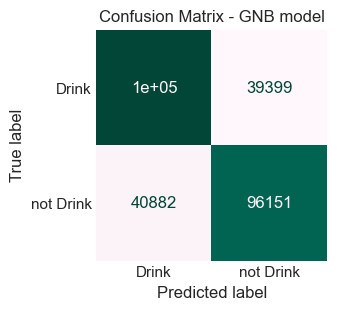

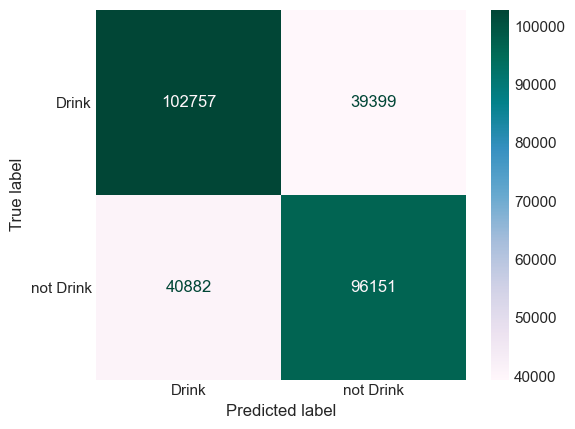

In [ ]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Drink', 'not Drink'],
    ax=ax,
    colorbar=False,
    cmap="PuBuGn")
disp.plot(values_format='',
    cmap="PuBuGn")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

In [ ]:
# Chỉ số của confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

# Tính probability và ROC_AUC_score
y_proba = model.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Chỉ số chính xác của mô hình
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
# Cập nhật dictionary
model_results[model_name] = {
  'Params': '',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## 2 - Gaussian Naive Bayes

In [ ]:
model_name = 'Gaussian Naive Bayes'    # Tạo biến model name để đặt tên chart + lưu dictionary
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# In ra chỉ số chính xác của mô hình
print(f"Kết quả mô hình {model_name}\n")
print(classification_report(y_test, y_pred))

Kết quả mô hình Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.69      0.73      0.71    142156
           1       0.71      0.67      0.69    137033

    accuracy                           0.70    279189
   macro avg       0.70      0.70      0.70    279189
weighted avg       0.70      0.70      0.70    279189



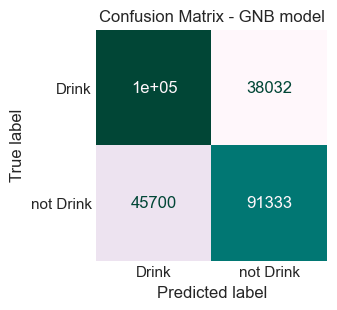

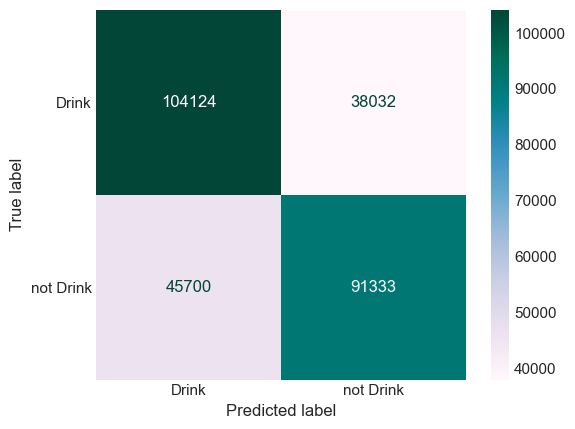

In [ ]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Drink', 'not Drink'],
    ax=ax,
    colorbar=False,
    cmap="PuBuGn")
disp.plot(values_format='',
    cmap="PuBuGn")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

In [ ]:
# Chỉ số của confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

# Tính probability và ROC_AUC_score
y_proba = model.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Chỉ số chính xác của mô hình
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
# Cập nhật dictionary
model_results[model_name] = {
  'Params': '',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## 3 - Decision Tree

Mô hình có score cao nhất = 71.83% tại số tầng = [8]


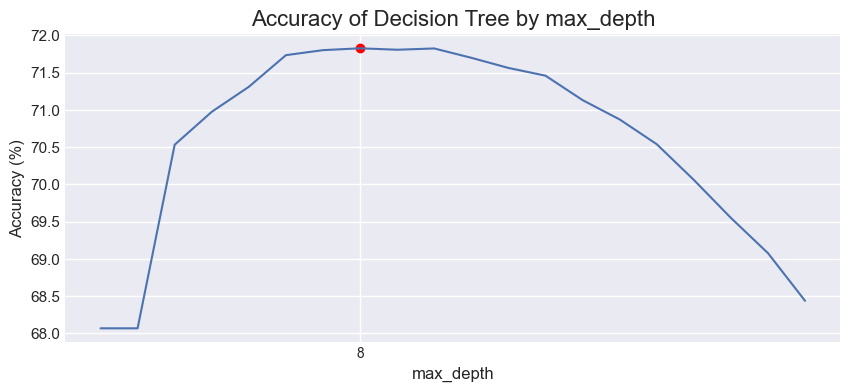

In [ ]:
# Kiểm tra giá trị max_depth phù hợp cho mô hình bằng vòng lặp
tree_scores = []
for d in range(1, 21):
    model = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    tree_scores.append(model_score*100)

# Plot score
max_depth = [n for n in range(1, 21)]
max_n =     [n      for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]
max_score = [score  for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]

print(f"Mô hình có score cao nhất = {max_score[0]:.2f}% tại số tầng = {max_n}")

plt.figure(figsize=(10, 4))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(max_depth, tree_scores)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('max_depth',fontsize=12)
plt.xticks(max_n, size=10)
plt.title("Accuracy of Decision Tree by max_depth", size=16)
plt.grid()
plt.show()

In [ ]:
model_name = 'Decision Tree'    # Tạo biến model name để đặt tên chart + lưu dictionary
model = tree.DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# In ra chỉ số chính xác của mô hình
print(f"Kết quả mô hình {model_name}\n")
print(classification_report(y_test, y_pred))

Kết quả mô hình Decision Tree

              precision    recall  f1-score   support

           0       0.74      0.70      0.72    142156
           1       0.70      0.74      0.72    137033

    accuracy                           0.72    279189
   macro avg       0.72      0.72      0.72    279189
weighted avg       0.72      0.72      0.72    279189



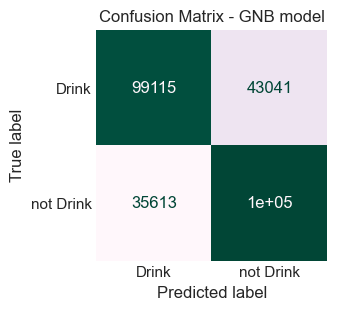

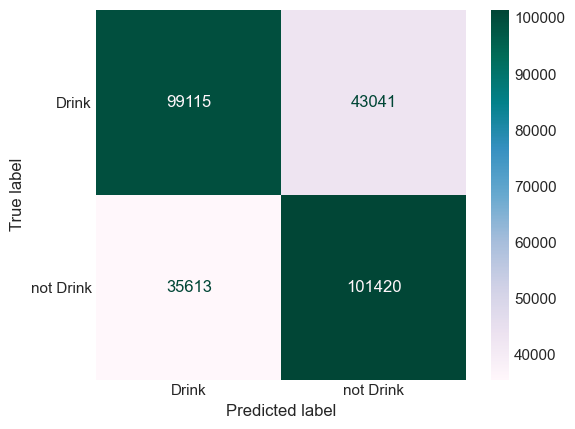

In [ ]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Drink', 'not Drink'],
    ax=ax,
    colorbar=False,
    cmap="PuBuGn")
disp.plot(values_format='',
    cmap="PuBuGn")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

In [ ]:
# Chỉ số của confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

# Tính probability và ROC_AUC_score
y_proba = model.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Chỉ số chính xác của mô hình
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
# Cập nhật dictionary
model_results[model_name] = {
  'Params': 'max_depth = 8',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## 4 - Random Forest

In [ ]:
# rf_scores = []
# for trees in range(20, 51):
#     model = RandomForestClassifier(n_estimators=trees, random_state=0)
#     model.fit(X_train, y_train)
#     model_score = model.score(X_test, y_test)
#     rf_scores.append(model_score*100)

# # Plot score
# n_estimators = [n for n in range(20, 51)]
# max_n =     [n      for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]
# max_score = [score  for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]

# print(f"Mô hình có score cao nhất = {max_score[0]:.2f}% tại số cây = {max_n}")

# plt.figure(figsize=(10, 4))
# plt.scatter(max_n, max_score, color='red', marker = 'o')
# plt.plot(n_estimators, rf_scores)
# plt.ylabel('Accuracy (%)',fontsize=12)
# plt.xlabel('n_estimators',fontsize=12)
# plt.xticks(max_n, size=10)
# plt.title("Accuracy of Random Forest by n_estimators", size=16)
# plt.grid()
# plt.show()

In [ ]:
# rf_scores

In [ ]:
model_name = 'Random Forest'    # Tạo biến model name để đặt tên chart + lưu dictionary
model = RandomForestClassifier(n_estimators=100
                               , random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# In ra chỉ số chính xác của mô hình
print(f"Kết quả mô hình {model_name}\n")
print(classification_report(y_test, y_pred))

Kết quả mô hình Random Forest

              precision    recall  f1-score   support

           0       0.71      0.69      0.70    142156
           1       0.69      0.70      0.70    137033

    accuracy                           0.70    279189
   macro avg       0.70      0.70      0.70    279189
weighted avg       0.70      0.70      0.70    279189



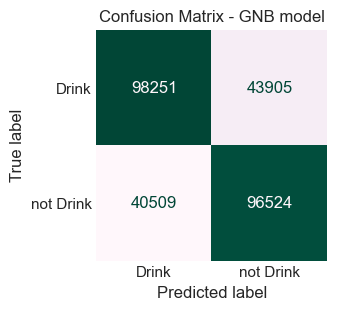

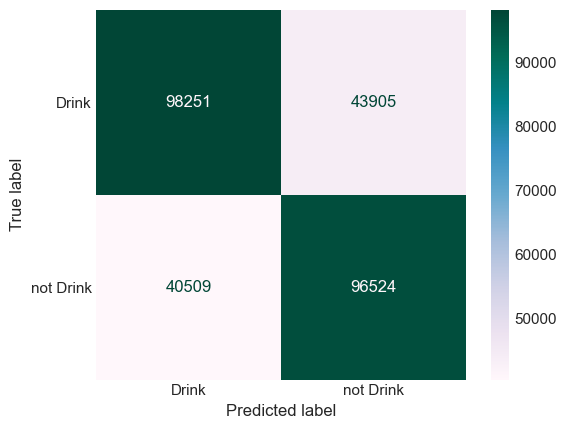

In [ ]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Drink', 'not Drink'],
    ax=ax,
    colorbar=False,
    cmap="PuBuGn")
disp.plot(values_format='',
    cmap="PuBuGn")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

In [ ]:
# Chỉ số của confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

# Tính probability và ROC_AUC_score
y_proba = model.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Chỉ số chính xác của mô hình
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
# Cập nhật dictionary
model_results[model_name] = {
  'Params': 'n_estimators = 100',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## 5 - K Nearest Neighbor

In [ ]:
# knn_scores = []
# for k in range(1, 6):
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(X_train, y_train)
#     model_score = model.score(X_test, y_test)
#     knn_scores.append(model_score*100)

# # Plot score
# n_neighbors = [k for k in range(1, 41)]
# max_n =     [k      for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
# max_score = [score  for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]

# print(f"Mô hình có score cao nhất = {max_score[0]:.2f}% tại số điểm = {max_n}")

# plt.figure(figsize=(12, 4))
# plt.scatter(max_n, max_score, color='red', marker = 'o')
# plt.plot(n_neighbors, knn_scores)
# plt.ylabel('Accuracy (%)',fontsize=12)
# plt.xlabel('n_neighbors',fontsize=12)
# plt.xticks(max_n, size=10)
# plt.title("Accuracy of K-Nearest Neighbors by n_neighbors", size=16)
# plt.grid()
# plt.show()

In [ ]:
model_name = 'K Nearest Neighbors'    # Tạo biến model name để đặt tên chart + lưu dictionary
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Dự đoán
y_pred = model.predict(X_test)

# In ra chỉ số chính xác của mô hình
print(f"Kết quả mô hình {model_name}\n")
print(classification_report(y_test, y_pred))

Kết quả mô hình K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.68      0.74      0.71    142156
           1       0.70      0.64      0.67    137033

    accuracy                           0.69    279189
   macro avg       0.69      0.69      0.69    279189
weighted avg       0.69      0.69      0.69    279189



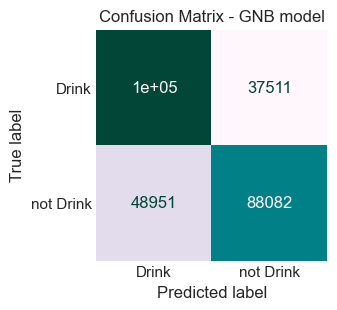

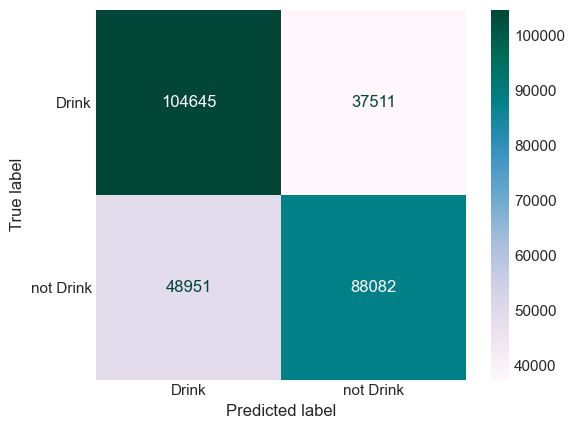

In [ ]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Drink', 'not Drink'],
    ax=ax,
    colorbar=False,
    cmap="PuBuGn")
disp.plot(values_format='',
    cmap="PuBuGn")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

In [ ]:
# Chỉ số của confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()

# Tính probability và ROC_AUC_score
y_proba = model.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Chỉ số chính xác của mô hình
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
# Cập nhật dictionary
model_results[model_name] = {
  'Params': 'n_neighbors = 10',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

# D - Compare Classification Models

In [ ]:
# Xem lại các mô hình đã đánh giá từ trước
model_results_df = pd.DataFrame.from_dict(model_results, orient='index').reset_index()
model_results_df.rename(columns={'index':'Model'}, inplace=True)
model_results_df.drop(columns=['FP_rate','TP_rate'], inplace=True)
model_results_df.round(4)

,Model,Params,TP,FN,TN,FP,Precision,Recall,F1_Score,Accuracy Score,AUC Score
0,Logistic Regression,,102757,39399,40882,96151,0.7093,0.7017,0.7055,0.7124,0.7848
1,Gaussian Naive Bayes,,104124,38032,45700,91333,0.7060,0.6665,0.6857,0.7001,0.7657
2,Decision Tree,max_depth = 8,99115,43041,35613,101420,0.7021,0.7401,0.7206,0.7183,0.7937
3,Random Forest,n_estimators = 100,98251,43905,40509,96524,0.6874,0.7044,0.6958,0.6976,0.7676
4,K Nearest Neighbors,n_neighbors = 10,104645,37511,48951,88082,0.7013,0.6428,0.6708,0.6903,0.7558


In [ ]:
model_results_df[['Model','TP','TN']]

,Model,TP,TN
0,Logistic Regression,102757,40882
1,Gaussian Naive Bayes,104124,45700
2,Decision Tree,99115,35613
3,Random Forest,98251,40509
4,K Nearest Neighbors,104645,48951


[]

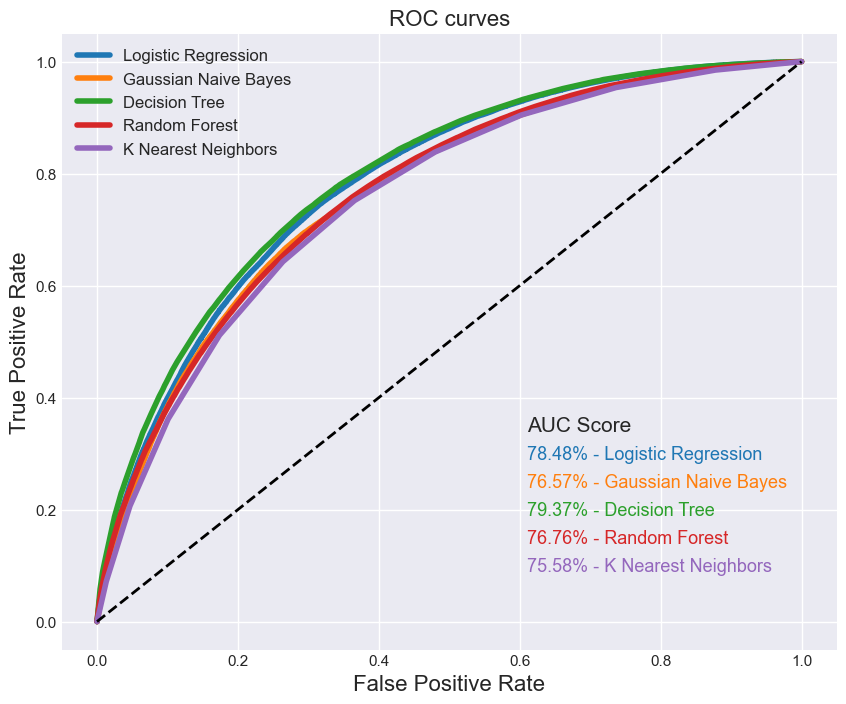

In [ ]:
models = ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors']
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

plt.figure(figsize=(10,8))

# Viết chữ "AUC Score"
plt.text(0.61, 0.34, f"AUC Score",size= 15)

for i, (model, color) in enumerate(zip(models, colors)):
  # Plot ROC curve
  plt.plot(model_results[model]['FP_rate'] ,model_results[model]['TP_rate'], linewidth=4, color=color)

  # Viết thông tin AUC Score
  plt.text(0.61, 0.29 - 0.05*i, f"{model_results[model]['AUC Score']*100:.2f}% - {model}", color=color, size=13)

# Vẽ Random chances line
plt.plot([0,1], ls='--', linewidth=2, color='black')

plt.legend(models, fontsize=12, loc='upper left')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.grid()
plt.plot()

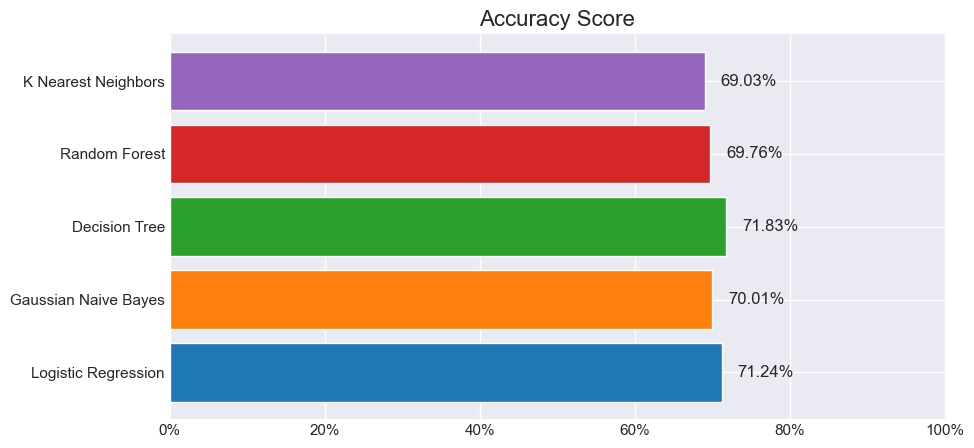

In [ ]:
# Vẽ bar chart so sánh Accuracy Score của các model
plt.figure(figsize=(10, 5))
bars = plt.barh(model_results_df['Model'], model_results_df['Accuracy Score'], color=colors)

# Viết giá trị score (dạng %) vào cuối bar chart
for bar, acc_score in zip(bars, model_results_df['Accuracy Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{acc_score*100:.2f}%', va='center', fontsize=12)

# Hiện giá trị của cột x từ 0% đến 100%
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.title('Accuracy Score', fontsize=16)
plt.grid()
plt.show()